* I'm excited to share a new approach for generating SVG code.
* 我很高兴和大家分享一个新的产生SVG代码的方式
* The SVG generation workflow demonstrated by this code is as follows:
* SVG生成过程如下所示
* Project URL: [https://github.com/joanrod/star-vector](https://github.com/joanrod/star-vector)
* 项目原地址看这个URL
* Many users couldn't directly utilize this project because it implemented Flash_attention, which cannot run on T4 GPUs.
* 很多用户无法直接运行这个项目在GPUT4上因为Flash_attention
* I've modified the code in the project to remove Flash_attention.
* 老外可能看不懂中文，所以我告诉你们，我直接在模型配置文件里把flashattention给禁掉了，所以现在可以用了
  

* First, enable the network button in the right sidebar and install the required dependencies before proceeding with subsequent steps.
* 你丫运行这个代码的时候记得先把右边栏的网络打开和依赖安装掉
* Or you can directly run this code, but remember to enable the network connection. If the network is already enabled, please disregard this reminder.
* 我知道你丫可能看不懂这个步骤，那你老老实实的把运行下面的代码吧
* !pip install git+https://github.com/hzdzkjdxyjs/meanless-project.git

In [1]:
!pip install git+https://github.com/Harsh-BH/text-to-svg-genie.git#subdirectory=model


  Cloning https://github.com/Harsh-BH/text-to-svg-genie.git to /tmp/pip-req-build-pv6rm4s9
  Running command git clone --filter=blob:none --quiet https://github.com/Harsh-BH/text-to-svg-genie.git /tmp/pip-req-build-pv6rm4s9
  Resolved https://github.com/Harsh-BH/text-to-svg-genie.git to commit 68c2d43a8dbfcbd16581ac5d7f59503634d7d236
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip


* Load and Launch Model from Kaggle
* 从kagglehub加载模型

In [2]:
from PIL import Image
from starvector.model.starvector_arch import StarVectorForCausalLM
from starvector.data.util import process_and_rasterize_svg
import torch
import kagglehub
import os 
path = kagglehub.model_download("adelinadolbow/starvector-1b-imgsvg/transformers/default")
base_model_path = os.path.join(path, "starcoderbase-1b")
model_path = os.path.join(path, "starvector-1b-im2svg")
starvector =  StarVectorForCausalLM.from_pretrained(model_path,
                                                    torch_dtype=torch.float16,
                                                   starcoder_model_name=base_model_path,
                                                   use_flash_attn=False
                                                   )
processor = starvector.model.processor
tokenizer = starvector.model.svg_transformer.tokenizer




/home/harsh1/github-repos/text-to-svg-genie/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


trainable params: 0 || all params: 1434095106 || trainable%: 0.0


Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.23s/it]


In [3]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.version.cuda)  # Check PyTorch's CUDA runtime version


True
12.4


In [7]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load model and tokenizer
model = AutoModelForCausalLM.from_pretrained("starvector/starvector-8b-im2svg", trust_remote_code=True)
tokenizer = model.svg_transformer.tokenizer
model.cuda()

# Prepare batch
batch = {
    "caption": ["A green triangle with rounded corners", "Red hexagon with gradient fill"],
    "image": torch.zeros((2, 3, 256, 256)).cuda()  # Batch size 2, dummy image
}

# Generation parameters
generate_config = {
    "max_length": 512,
    "temperature": 0.7,
    "top_p": 0.9,
    "num_beams": 3,
    "repetition_penalty": 1.2
}

# Generate SVG tokens
output_tokens = model.model.generate_text2svg(batch, **generate_config)

# Decode to SVG strings
svgs = [tokenizer.decode(seq, skip_special_tokens=True) for seq in output_tokens]


MissingCUDAException: CUDA_HOME does not exist, unable to compile CUDA op(s)

* open an image
* 随便打开一张图片

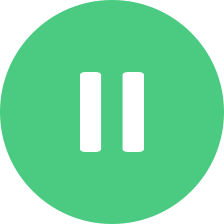

In [ ]:
Image.open('/kaggle/input/my-picture/sample-6.png')

* 产生svg
* Generate SVG

In [ ]:
starvector.cuda()
starvector.eval()
image_pil = Image.open('/kaggle/input/my-picture/sample-6.png')
image =starvector.process_images([image_pil])[0].cuda()
if not image.shape[0] == 1:
    image = image.squeeze(0)
batch ={"image": image,"use_flash_attn": False}

raw_svg = starvector.generate_im2svg(batch, max_length=4000)[0]
svg, raster_image = process_and_rasterize_svg(raw_svg)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


* 查看结果
* view the result

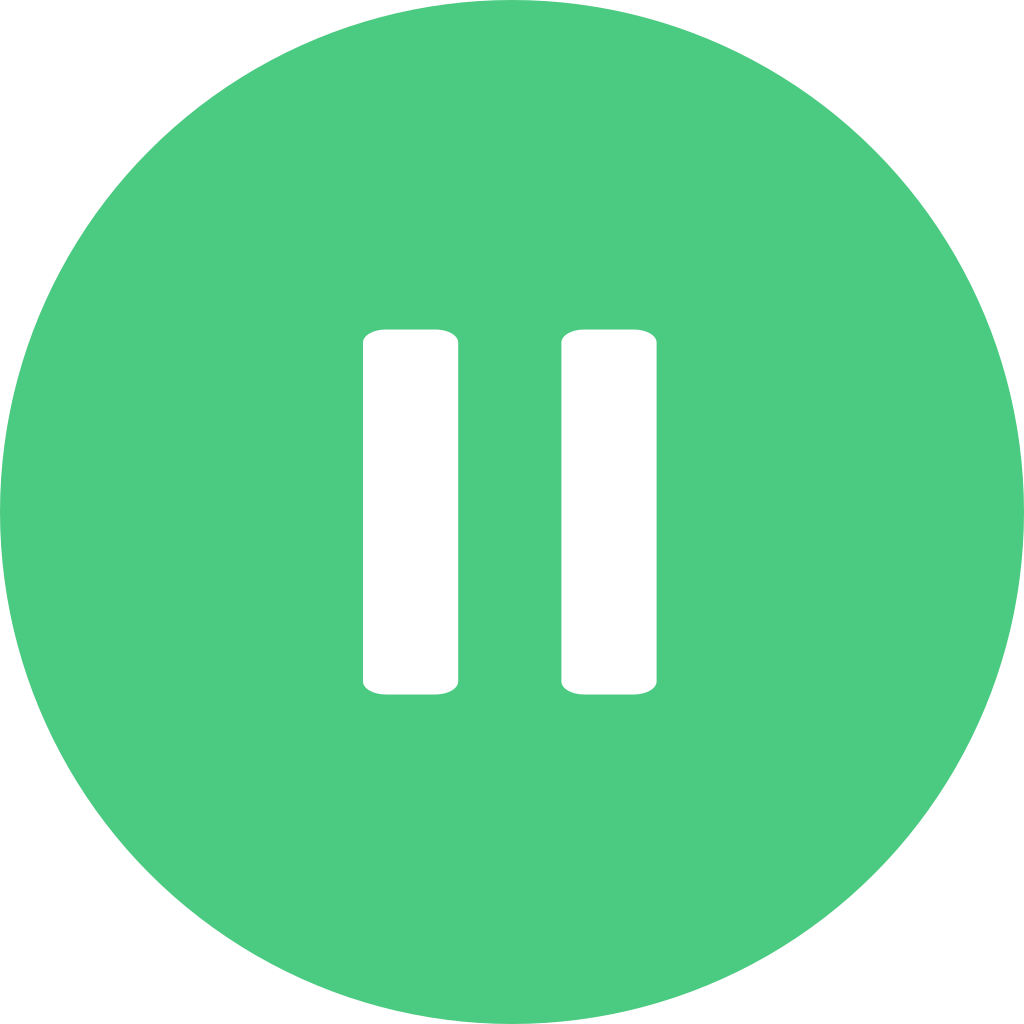

In [ ]:
from IPython.display import SVG
SVG(svg)